In [ ]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(file_path)

#printing some information about dataset
print(telco.info())
print(telco['Churn'])
print(telco['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#understanding the dataset better using groupby method
print(telco.groupby(['Churn']).mean())
print(telco.groupby(['Churn']).std())

       SeniorCitizen     tenure  MonthlyCharges
Churn                                          
No          0.128721  37.569965       61.265124
Yes         0.254682  17.979133       74.441332
       SeniorCitizen     tenure  MonthlyCharges
Churn                                          
No          0.334923  24.113777       31.092648
Yes         0.435799  19.531123       24.666053


In [ ]:
#more on groupby
print(telco.groupby('InternetService')['Churn'].value_counts())

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64


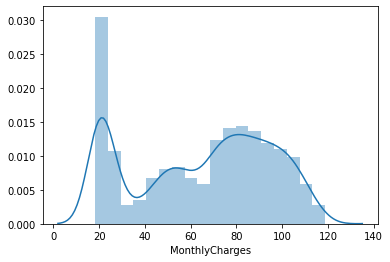

In [ ]:
#distribution plot of a feature
sns.distplot(telco['MonthlyCharges'])
plt.show()

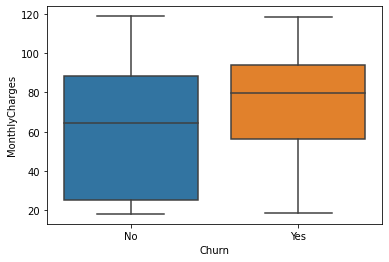

In [ ]:
#boxplot of two features
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco)
plt.show()

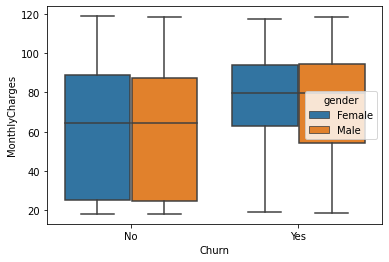

In [ ]:
#boxplot of three features
sns.boxplot(x='Churn', y='MonthlyCharges', hue='gender', data=telco)
plt.show()

In [ ]:
#encoding categorical data
print(telco.gender)
telco.gender = telco.gender.replace({'Male':0, 'Female':1})
print(telco.gender)

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64


In [ ]:
#encoding categorical data
telco.Partner = telco.Partner.replace({'No':0, 'Yes':1})
telco.Dependents = telco.Dependents.replace({'No':0, 'Yes':1})
telco.PhoneService = telco.PhoneService.replace({'No':0, 'Yes':1})
telco.MultipleLines = telco.MultipleLines.replace({'No':0, 'Yes':1, 'No phone service':2})
telco.InternetService = telco.InternetService.replace({'Fiber optic':0, 'DSL':1, 'No':2})
telco.OnlineSecurity = telco.OnlineSecurity.replace({'No':0, 'Yes':1, 'No internet service':2})
telco.OnlineBackup = telco.OnlineBackup.replace({'No':0, 'Yes':1, 'No internet service':2})
telco.DeviceProtection = telco.DeviceProtection.replace({'No':0, 'Yes':1, 'No internet service':2})
telco.TechSupport = telco.TechSupport.replace({'No':0, 'Yes':1, 'No internet service':2})
telco.StreamingTV = telco.StreamingTV.replace({'No':0, 'Yes':1, 'No internet service':2})
telco.StreamingMovies = telco.StreamingMovies.replace({'No':0, 'Yes':1, 'No internet service':2})
telco.Contract = telco.Contract.replace({'Month-to-month':0, 'Two year':1, 'One year':2})
telco.PaperlessBilling = telco.PaperlessBilling.replace({'No':0, 'Yes':1})
telco.PaymentMethod = telco.PaymentMethod.replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
telco.Churn = telco.Churn.replace({'No':0, 'Yes':1})

In [ ]:
telco.TotalCharges[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] = 0 #have some issue (they are not float)
telco.TotalCharges = telco.TotalCharges.astype('float64')
telco.info()
telco.PaymentMethod.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0    2365
1    1612
2    1544
3    1522
Name: PaymentMethod, dtype: int64

In [ ]:
telco.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.000485,-0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,-0.006171,0.011754,0.005209,0.014569,0.000080,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,-0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.109299,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.216229,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.178429,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,-0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.503232,0.006152,0.340305,0.247900,0.826178,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,-0.000955,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,-0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.040607,0.108230,0.030659,0.146153,0.250628,0.019423
InternetService,-0.010380,-0.259390,0.000132,0.179631,-0.033230,-0.093720,-0.174989,1.000000,0.764943,0.686403,0.682448,0.760985,0.617704,0.620005,0.203148,-0.378108,0.178137,-0.905491,-0.428963,-0.316846
OnlineSecurity,0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.275864,-0.334003,0.213800,-0.621227,-0.154380,-0.332819
OnlineBackup,0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.252097,-0.262402,0.182909,-0.538454,-0.086220,-0.291449


In [ ]:
features = ['gender', 'SeniorCitizen', 'Dependents', 'PhoneService', 'OnlineSecurity',
            'OnlineBackup', 'StreamingTV',  'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

y = telco.Churn
x = telco[features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_prediction = svm_classifier.predict(x_test)
print(accuracy_score(svm_prediction, y_test))

0.7331061896649631


In [ ]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_prediction = logistic_classifier.predict(x_test)
print(accuracy_score(logistic_prediction, y_test))

0.7802385008517888


In [ ]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_prediction = tree_classifier.predict(x_test)
print(accuracy_score(tree_prediction, y_test))

0.6950596252129472


In [ ]:
forest_classifier = RandomForestClassifier()
forest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest_prediction = forest_classifier.predict(x_test)
print(accuracy_score(forest_prediction, y_test))

0.7342419080068143


In [ ]:
print(confusion_matrix(y_test, forest_prediction))

[[1098  193]
 [ 275  195]]


In [ ]:
forest_probability = forest_classifier.predict_proba(x_test)
print(forest_probability)

[[0.62  0.38 ]
 [0.97  0.03 ]
 [0.71  0.29 ]
 ...
 [0.996 0.004]
 [0.91  0.09 ]
 [0.05  0.95 ]]


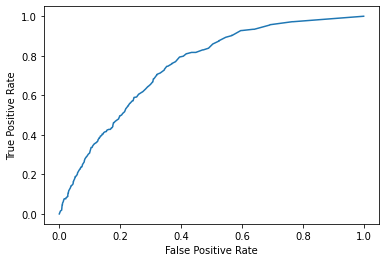

In [ ]:
x_forest_probability = forest_probability[:, 0]
y_forest_probability = forest_probability[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_forest_probability)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_forest_probability)
print(auc)

0.749541012245167


In [ ]:
print(f1_score(y_test, forest_prediction))

0.45454545454545453


In [ ]:
#hyperparameter tuning using GridSearchCV

param_grid = {'n_estimators': np.arange(100, 200)}
grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid)
grid_search_random_forest.fit(x, y)
print(grid_search_random_forest.best_params_)
print(grid_search_random_forest.best_score_)

KeyboardInterrupt: ignored

In [ ]:
#hyperparameter tuning using RandomizedSearchCV

param_dist = {'n_estimators': np.arange(100, 200)}
randomized_search_random_forest = RandomizedSearchCV(RandomForestClassifier(), param_dist)
randomized_search_random_forest.fit(x, y)
print(randomized_search_random_forest.best_params_)
print(randomized_search_random_forest.best_score_)

{'n_estimators': 170}
0.7403091530098715


In [ ]:
#calculating frature importances
feature_importances = forest_classifier.feature_importances_
print(feature_importances)

[0.03345303 0.02560822 0.02681311 0.01007741 0.05859273 0.04271255
 0.0297579  0.11771234 0.02843901 0.08263039 0.5442033 ]


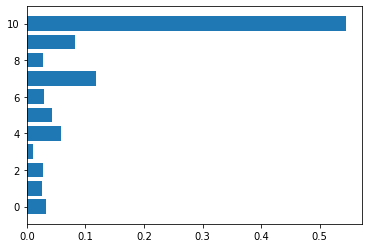

In [ ]:
plt.barh(range(0, x.shape[1]), feature_importances)
plt.show()

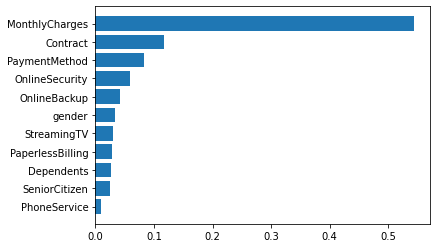

In [ ]:
#sorting indexes of feature_importances
sorted_index = np.argsort(feature_importances)

#creating labels
labels = x.columns[sorted_index]

plt.barh(range(0, x.shape[1]), feature_importances[sorted_index], tick_label=labels)
plt.show()